<a href="https://colab.research.google.com/github/IvanGomez37/Final-Project-FoML/blob/main/seoul_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing, Initializing the .csv via Drive**

In [59]:
''' Unncoment if working in VSC
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
'''

' Unncoment if working in VSC\n# libraries for the files in google drive\nfrom pydrive.auth import GoogleAuth\nfrom google.colab import drive\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\n'

In [60]:
''' Unncoment if working in VSC
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1Px7HKM8lKoaLgMnMDPGkrQWVdfODCOmt'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('SeoulBikeData.csv')
df = pd.read_csv("SeoulBikeData.csv", encoding='latin-1')
'''

' Unncoment if working in VSC\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)\nfile_id = \'1Px7HKM8lKoaLgMnMDPGkrQWVdfODCOmt\'\ndownload = drive.CreateFile({\'id\': file_id})\ndownload.GetContentFile(\'SeoulBikeData.csv\')\ndf = pd.read_csv("SeoulBikeData.csv", encoding=\'latin-1\')\n'

# **Setting up the dataset**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [62]:
SeoulBikeData = pd.read_csv('./SeoulBikeData.csv', encoding='latin-1') # Comment if working in Colab
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [63]:
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


*We need to convert the object parameters to integer parameters*


In [64]:
SeoulBikeData['Seasons'] = pd.factorize(SeoulBikeData['Seasons'])[0]
SeoulBikeData['Holiday'] = pd.factorize(SeoulBikeData['Holiday'])[0]
SeoulBikeData['Functioning Day'] = pd.factorize(SeoulBikeData['Functioning Day'])[0]

In [65]:
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0


*For the Date parameter we need to use a different way to convert the object to a integer due to the information it has.*



In [66]:
SeoulBikeData['Date'] = pd.to_datetime(SeoulBikeData['Date'], format='%d/%m/%Y')

In [67]:
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0


# **Exploring the dataset**


## Correlation matrix

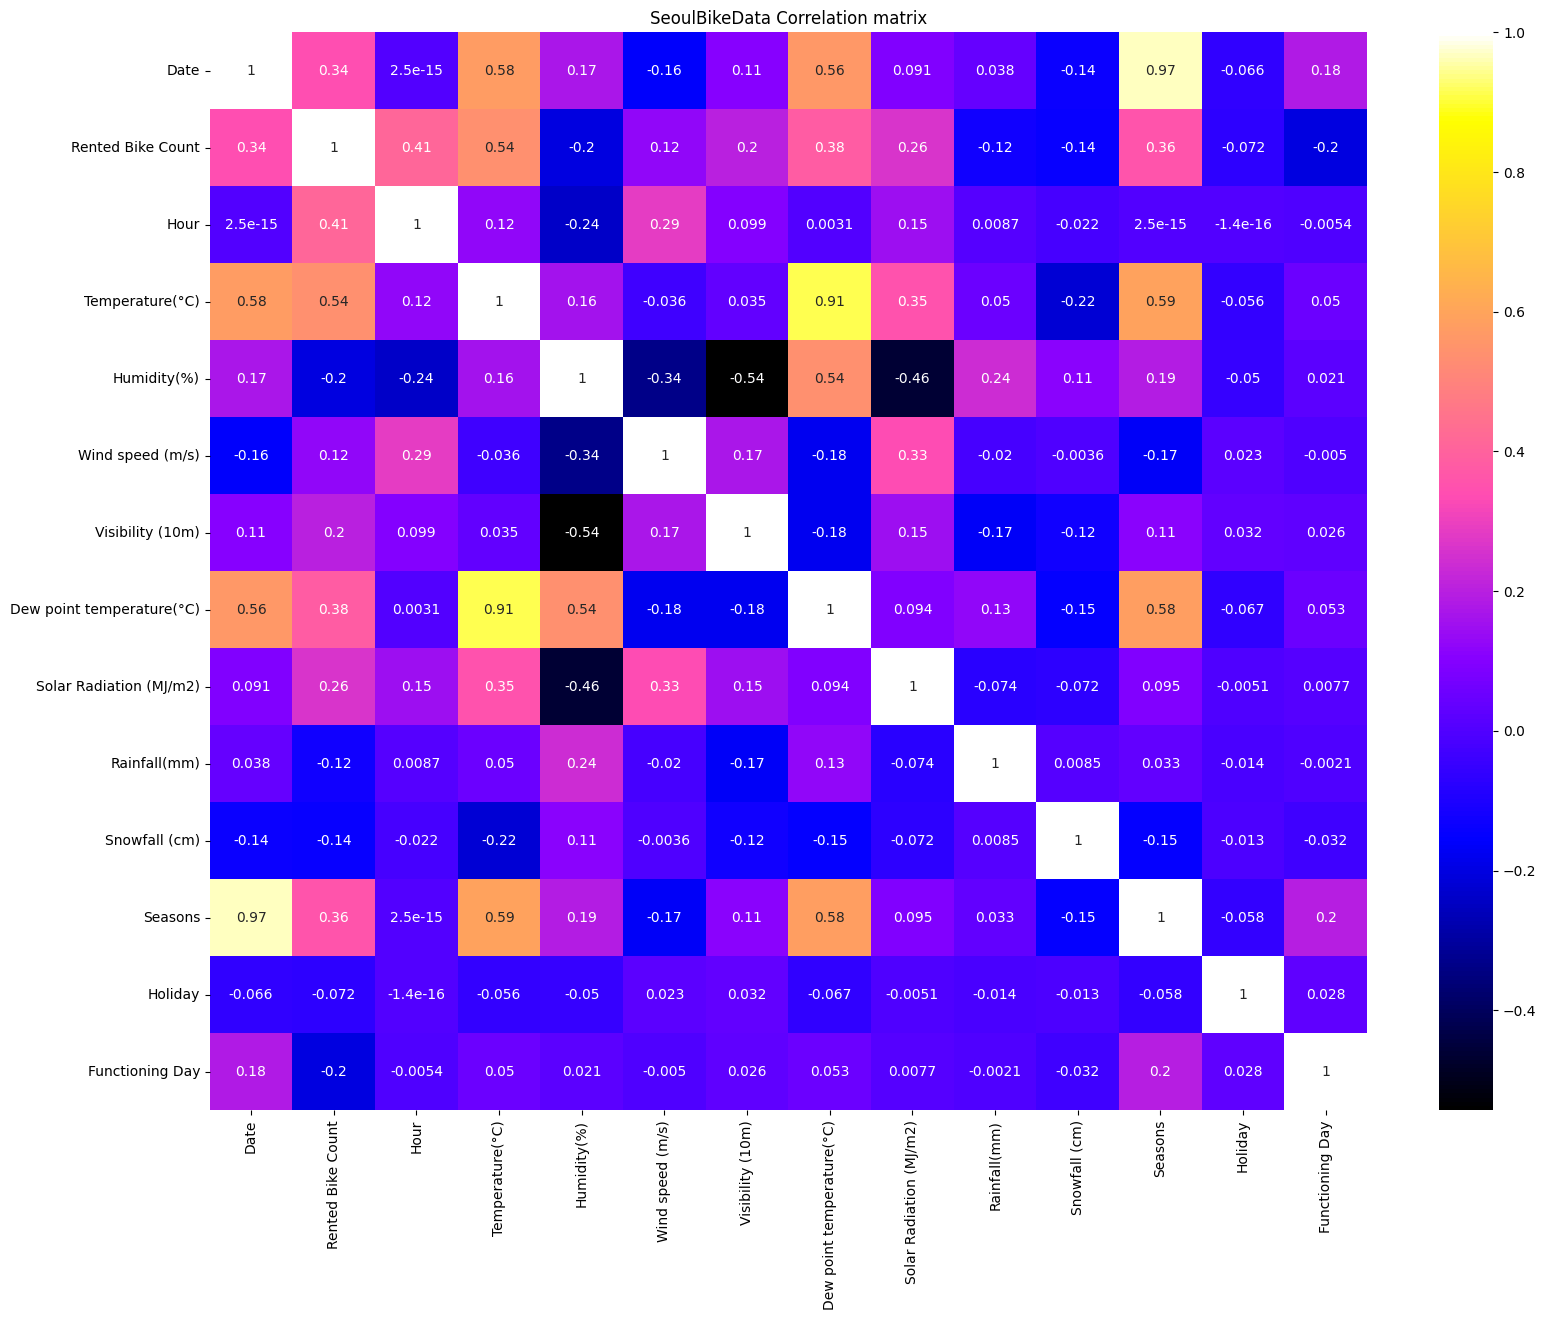

In [68]:
# Generating Correlation matrix of SeoulBikeData
correlation_matrix = SeoulBikeData.corr()

# Plotting Correlation matrix
num_rows, num_cols = SeoulBikeData.shape
plt.figure(figsize=(num_cols + (num_cols / 3), num_cols))
plt.title("SeoulBikeData Correlation matrix")
ax = sns.heatmap(correlation_matrix, annot = True, cmap= 'gnuplot2')
plt.show()